In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np

np.random.seed(0)

data = np.random.normal(loc=0, scale=0.5, size=100)

data_min = data.min()
data_max = data.max()
data_normalized = (data - data_min) / (data_max - data_min)

data_scaled = data_normalized * (5 - (-1)) + (-1)

print(data_scaled)


[ 4.37085332  2.67402469  3.39383987  4.96409336  4.4996252   0.96035094
  3.3581968   1.9878829   2.04777207  2.68701475  2.35539246  3.98545594
  3.12299791  2.32756363  2.72839957  2.59131301  4.03497824  1.92094874
  2.56567621  1.11360245 -1.          2.98935724  3.25163646  1.25285601
  5.          0.36680368  2.23311554  1.9433108   4.08312528  4.00422359
  2.368958    2.64666099  1.07168854 -0.28813145  1.74334793  2.37070166
  3.70679781  3.67207381  1.69431195  1.80009081  0.87167726  0.40953587
  0.05340804  4.60315638  1.54212637  1.63117676  0.6175783   3.14346671
  0.16832892  1.91151592  1.06213281  2.65753444  1.54069197  0.70735686
  2.1411255   2.70907693  2.25894155  2.55249392  1.38702392  1.72489908
  1.33957581  1.72886529  1.16454787  0.0285105   2.39692388  1.67632951
  0.14804939  2.75193682  1.0474128   2.24081267  3.08325229  2.33665542
  3.59372112  0.63993429  2.67674235  1.32421155  1.09282414  1.45603744
  1.78858311  2.24606272  0.72661852  3.29690979  2

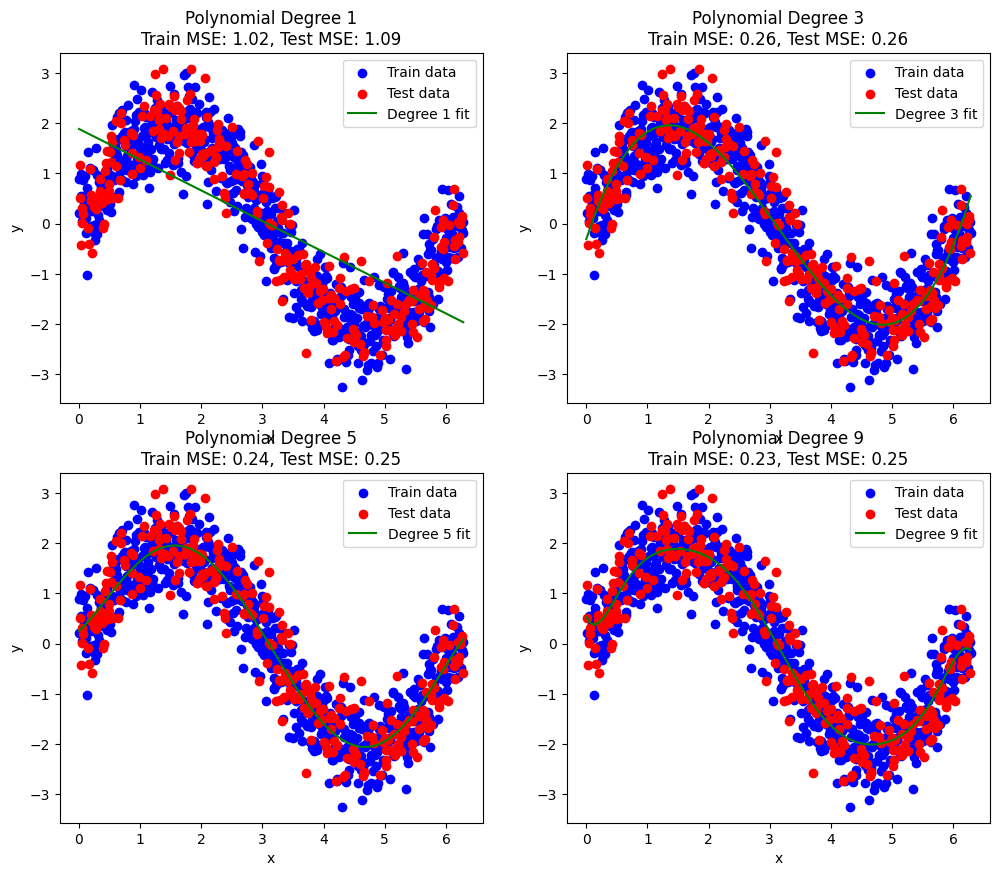

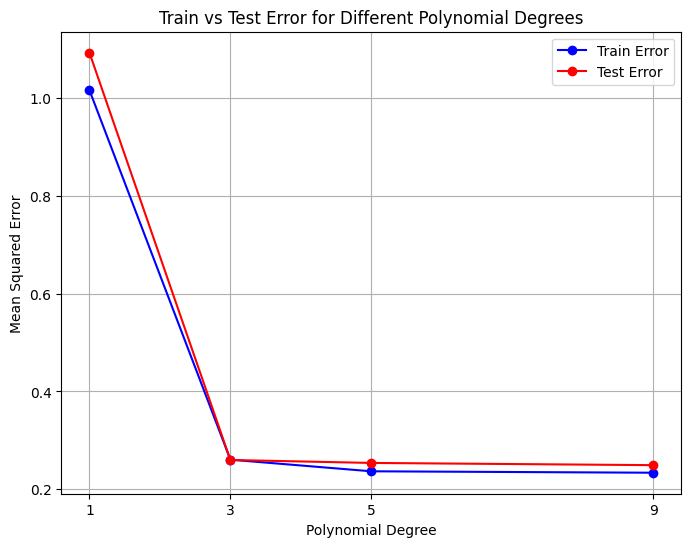

<Figure size 640x480 with 0 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(0)

n_samples = 1000
X = np.linspace(0, 2 * np.pi, n_samples)
S = np.random.normal(0, 0.5, size=n_samples)  
Y = 2 * np.sin(X)+S 

X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

degrees = [1, 3, 5, 9]

train_errors = []
test_errors = []

x_plot = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

plt.figure(figsize=(12, 10))

for i, deg in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree=deg)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    x_plot_poly = poly.transform(x_plot)

    model = LinearRegression()
    model.fit(X_train_poly, Y_train)

    Y_train_pred = model.predict(X_train_poly)
    Y_test_pred = model.predict(X_test_poly)
    y_plot_pred = model.predict(x_plot_poly)

    train_mse = mean_squared_error(Y_train, Y_train_pred)
    test_mse = mean_squared_error(Y_test, Y_test_pred)
    train_errors.append(train_mse)
    test_errors.append(test_mse)

    plt.subplot(2, 2, i)
    plt.scatter(X_train, Y_train, color='blue', label='Train data')
    plt.scatter(X_test, Y_test, color='red', label='Test data')
    plt.plot(x_plot, y_plot_pred, color='green', label=f'Degree {deg} fit')
    plt.title(f'Polynomial Degree {deg}\nTrain MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
# Plot Train and Test Error vs Polynomial Degree
plt.figure(figsize=(8, 6))
plt.plot(degrees, train_errors, marker='o', label='Train Error', color='blue')
plt.plot(degrees, test_errors, marker='o', label='Test Error', color='red')
plt.title('Train vs Test Error for Different Polynomial Degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()

plt.tight_layout()
plt.show()


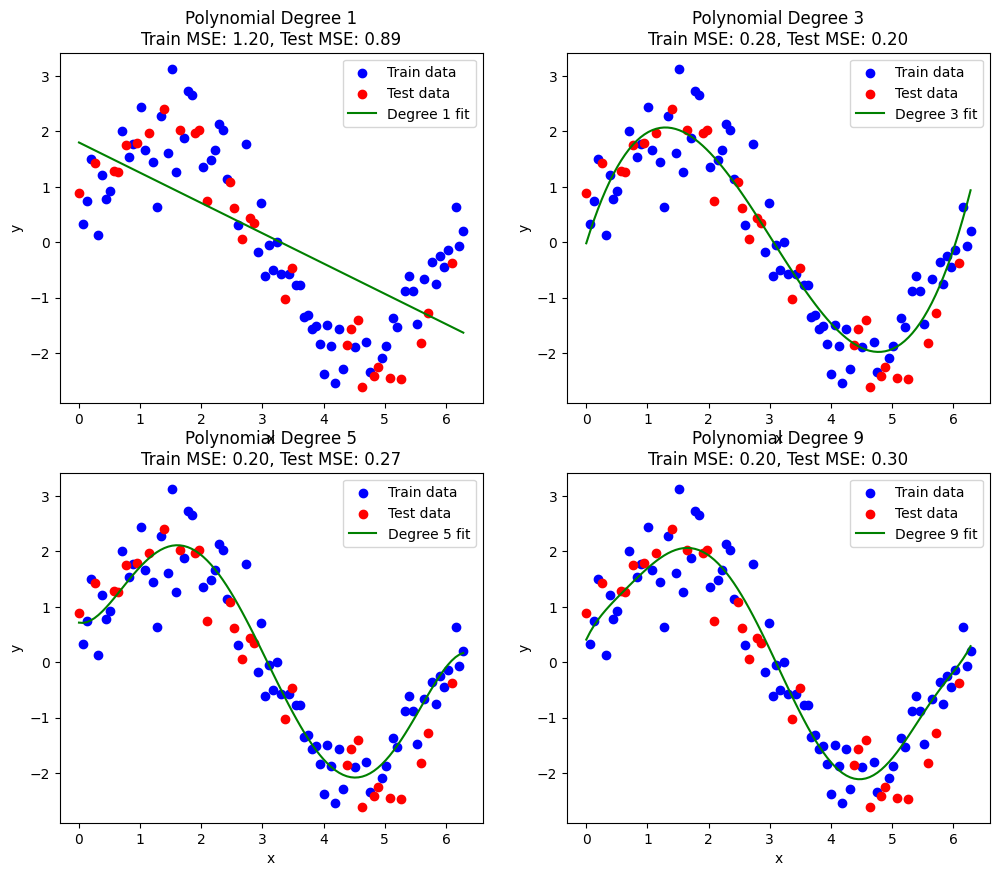

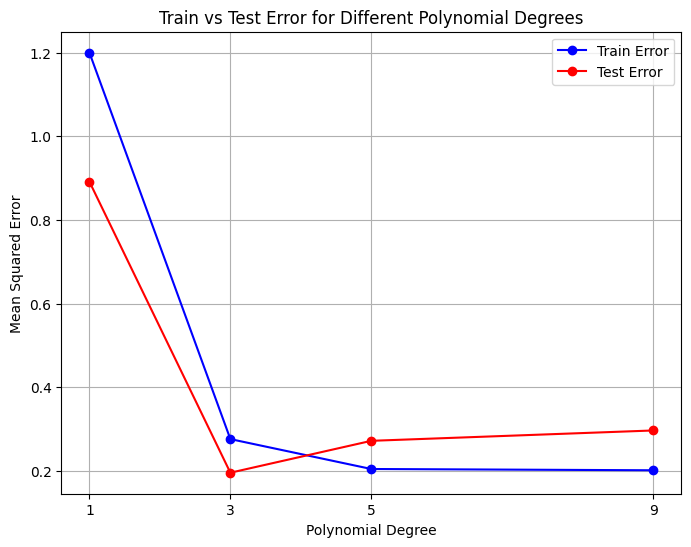

<Figure size 640x480 with 0 Axes>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(0)

n_samples = 100
X = np.linspace(0, 2 * np.pi, n_samples)
S = np.random.normal(0, 0.5, size=n_samples)  
Y = 2 * np.sin(X)+S 

X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

degrees = [1, 3, 5, 9]

train_errors = []
test_errors = []

x_plot = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

plt.figure(figsize=(12, 10))

for i, deg in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree=deg)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    x_plot_poly = poly.transform(x_plot)

    model = LinearRegression()
    model.fit(X_train_poly, Y_train)

    Y_train_pred = model.predict(X_train_poly)
    Y_test_pred = model.predict(X_test_poly)
    y_plot_pred = model.predict(x_plot_poly)

    train_mse = mean_squared_error(Y_train, Y_train_pred)
    test_mse = mean_squared_error(Y_test, Y_test_pred)
    train_errors.append(train_mse)
    test_errors.append(test_mse)

    plt.subplot(2, 2, i)
    plt.scatter(X_train, Y_train, color='blue', label='Train data')
    plt.scatter(X_test, Y_test, color='red', label='Test data')
    plt.plot(x_plot, y_plot_pred, color='green', label=f'Degree {deg} fit')
    plt.title(f'Polynomial Degree {deg}\nTrain MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
# Plot Train and Test Error vs Polynomial Degree
plt.figure(figsize=(8, 6))
plt.plot(degrees, train_errors, marker='o', label='Train Error', color='blue')
plt.plot(degrees, test_errors, marker='o', label='Test Error', color='red')
plt.title('Train vs Test Error for Different Polynomial Degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()

plt.tight_layout()
plt.show()


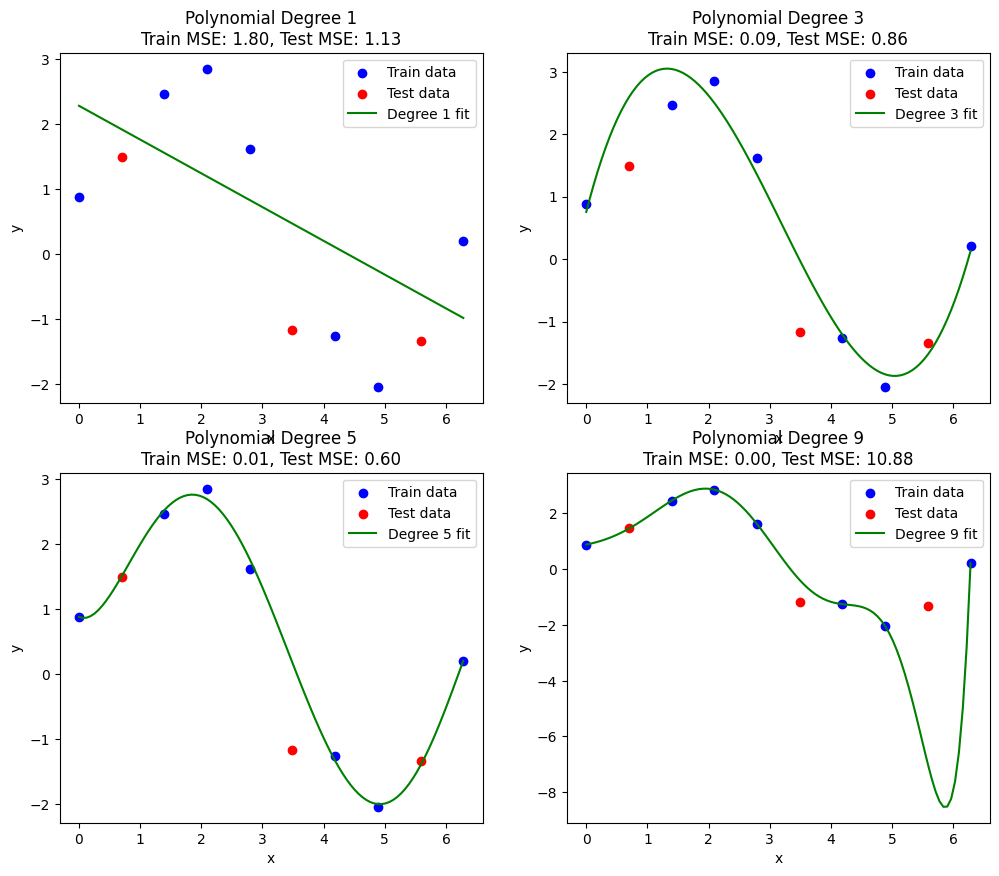

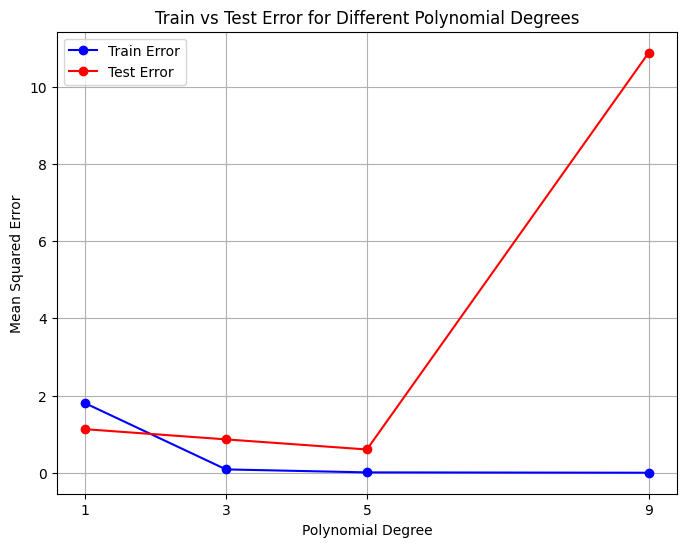

<Figure size 640x480 with 0 Axes>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(0)

n_samples = 10
X = np.linspace(0, 2 * np.pi, n_samples)
S = np.random.normal(0, 0.5, size=n_samples)  
Y = 2 * np.sin(X)+S 

X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

degrees = [1, 3, 5, 9]

train_errors = []
test_errors = []

x_plot = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

plt.figure(figsize=(12, 10))

for i, deg in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree=deg)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    x_plot_poly = poly.transform(x_plot)

    model = LinearRegression()
    model.fit(X_train_poly, Y_train)

    Y_train_pred = model.predict(X_train_poly)
    Y_test_pred = model.predict(X_test_poly)
    y_plot_pred = model.predict(x_plot_poly)

    train_mse = mean_squared_error(Y_train, Y_train_pred)
    test_mse = mean_squared_error(Y_test, Y_test_pred)
    train_errors.append(train_mse)
    test_errors.append(test_mse)

    plt.subplot(2, 2, i)
    plt.scatter(X_train, Y_train, color='blue', label='Train data')
    plt.scatter(X_test, Y_test, color='red', label='Test data')
    plt.plot(x_plot, y_plot_pred, color='green', label=f'Degree {deg} fit')
    plt.title(f'Polynomial Degree {deg}\nTrain MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
# Plot Train and Test Error vs Polynomial Degree
plt.figure(figsize=(8, 6))
plt.plot(degrees, train_errors, marker='o', label='Train Error', color='blue')
plt.plot(degrees, test_errors, marker='o', label='Test Error', color='red')
plt.title('Train vs Test Error for Different Polynomial Degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()

plt.tight_layout()
plt.show()
